#### Global river analysis
The global river dataset (SWORD) used for analysis is from: https://www.swordexplorer.com/


In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import geopandas as gpd
import pandas as pd
from glob import glob
import cartopy.feature as cfeature
from pyogrio import read_dataframe   ### faster when reading vector data by compared with geopandas
from utils.utils import add_basemap


In [2]:
dir_rivers = 'data/rivers/sword'
paths_rivers = glob(dir_rivers+'/*reaches*.gpkg')
proj = ccrs.PlateCarree()


In [3]:
regions_name = [path.split('/')[-1][0:2] for path in paths_rivers]
print(regions_name)

['eu', 'af', 'sa', 'oc', 'as', 'na']


In [4]:
rivers_regions_gpd = [read_dataframe(path) for path in paths_rivers]
rivers_gpd = pd.concat(rivers_regions_gpd, ignore_index=True)
print(len(rivers_gpd))
rivers_gpd.head(2)


241852


,x,y,reach_id,reach_len,n_nodes,wse,wse_var,width,width_var,facc,...,n_rch_dn,rch_id_up,rch_id_dn,swot_orbit,swot_obs,type,river_name,edit_flag,trib_flag,geometry
0,32.373485,30.356807,21101200013,7489.405792,37,0.0,0.0,6522.109375,1.336063e+07,3598.812012,...,1,21101200053 21101200033,21101200165,12,1,3,NODATA,NaN,0,"LINESTRING (32.39141 30.32653, 32.39172 30.326..."
1,32.392493,30.327299,21101200033,182.369272,1,0.0,0.0,17102.500000,8.487049e+06,2650.751221,...,1,21101200176,21101200013,12,1,3,NODATA,3,0,"LINESTRING (32.39358 30.32789, 32.39327 30.327..."


In [5]:
ids_river = np.where(rivers_gpd['type']<=3)[0]  ## select the river reaches. 
rivers_gpd = rivers_gpd.loc[ids_river,:]
rivers_gpd = rivers_gpd.reset_index()
print(len(rivers_gpd))


182391


<GeoAxes: >

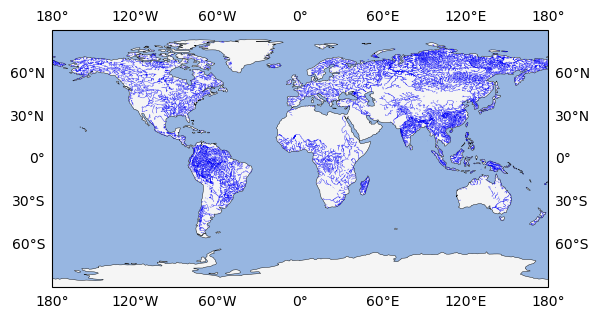

In [6]:
ax = plt.axes(projection=proj)
add_basemap(ax=ax)
rivers_gpd.plot(ax=ax, edgecolor='blue', linewidth=0.2)


Text(0.5, 0, 'Elevation (m)')

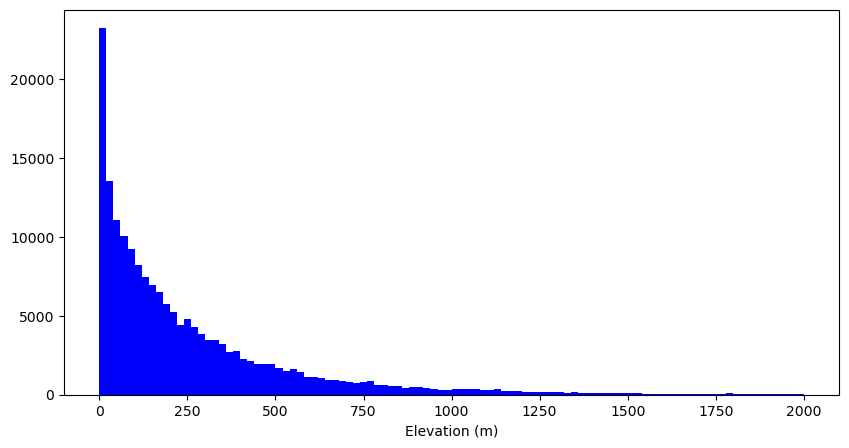

In [7]:
### histogram statistic for the river elevation
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.hist(rivers_gpd['wse'], bins=100, facecolor='blue', range=[0, 2000]);
ax.set_xlabel('Elevation (m)')


Text(0.5, 0, 'River Width (m)')

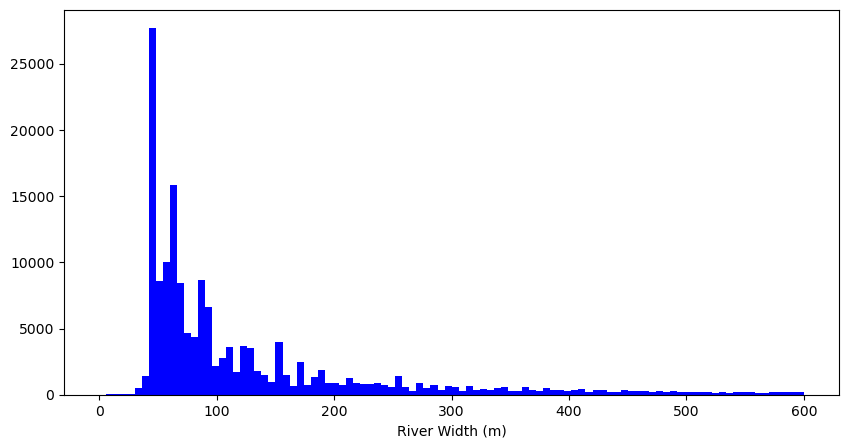

In [8]:
### histogram statistic for the river width
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.hist(rivers_gpd['width'], bins=100, facecolor='blue', range=[0, 600]);
ax.set_xlabel('River Width (m)')


In [9]:
ids_rivers_width_le200 = np.where(rivers_gpd['width']>=200)[0]
rivers_width_le200 = rivers_gpd.loc[ids_rivers_width_le200,:]
print(len(rivers_width_le200))


49572


<GeoAxes: >

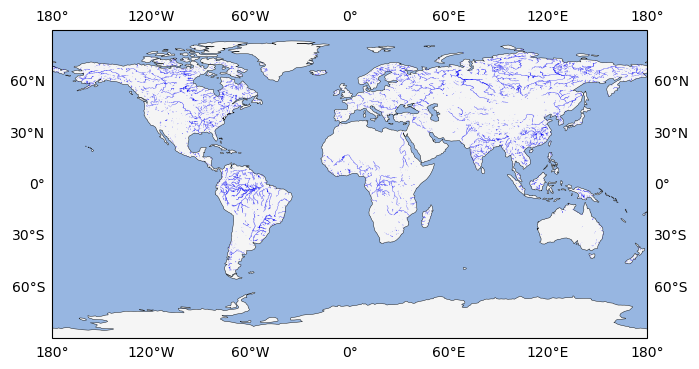

In [10]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(projection=proj)
add_basemap(ax=ax)
rivers_width_le200.plot(ax=ax, edgecolor='blue', linewidth=0.2)


Text(0.5, 0, 'Reach lenth (m)')

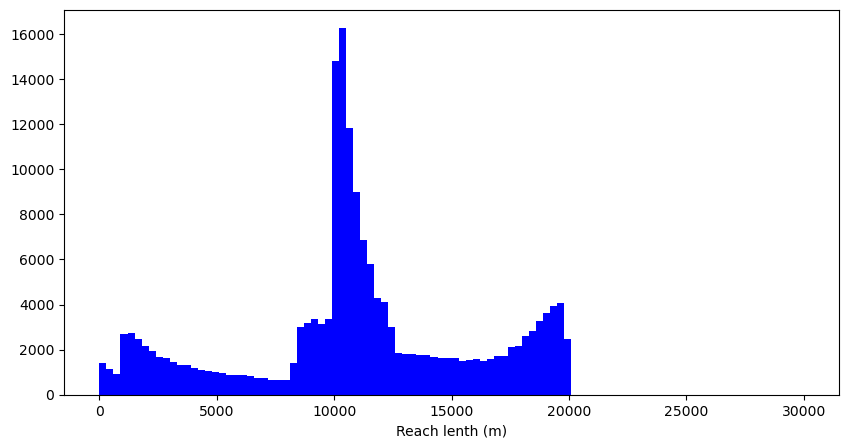

In [11]:
### histogram statistic for the river width
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.hist(rivers_gpd['reach_len'], bins=100, facecolor='blue', range=[0, 30000]);
ax.set_xlabel('Reach lenth (m)')


In [12]:
ids_rivers_lenth_le10000 = np.where(rivers_gpd['reach_len']>=10000)[0]
rivers_lenth_le10000 = rivers_gpd.loc[ids_rivers_lenth_le10000,:]
print(len(rivers_lenth_le10000))


127395


<GeoAxes: >

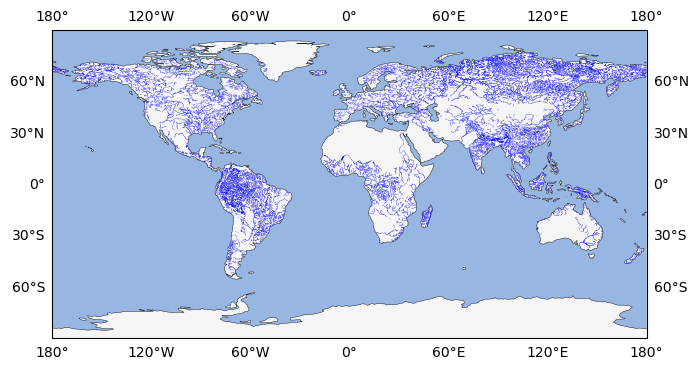

In [13]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(projection=proj)
add_basemap(ax=ax)
rivers_lenth_le10000.plot(ax=ax, edgecolor='blue', linewidth=0.2)


In [20]:
print(len(rivers_gpd))
ids_rivers_with_name = np.where(rivers_gpd['river_name']!='NODATA')[0]
rivers_with_name = rivers_gpd.loc[ids_rivers_with_name,:]


182391
94784


<GeoAxes: >

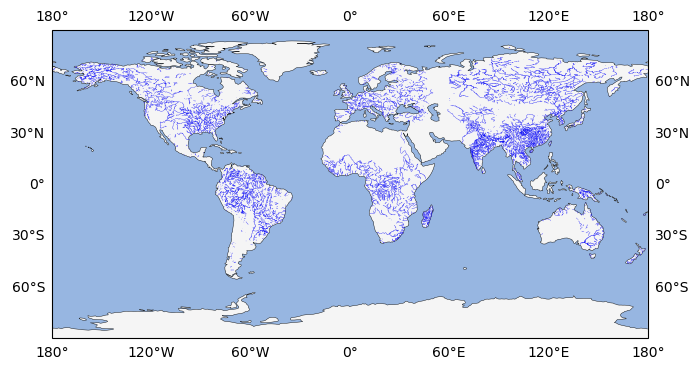

In [21]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(projection=proj)
add_basemap(ax=ax)
rivers_with_name.plot(ax=ax, edgecolor='blue', linewidth=0.2)
